# Using Node2Vec to learn presentation and cluster nodes in karate class network

## Importing the libraries

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Creating graph using networkx

In [2]:
nx_G = nx.read_edgelist('graph/karate.edgelist', nodetype=int, create_using=nx.Graph())

In [3]:
# Assign weight of edge to 1
for edge in nx_G.edges():
    nx_G[edge[0]][edge[1]]['weight'] = 1

In [4]:
# Nodes of the graph
nx_G.nodes()

NodeView((1, 32, 22, 20, 18, 14, 13, 12, 11, 9, 8, 7, 6, 5, 4, 3, 2, 31, 10, 33, 29, 28, 17, 34, 15, 16, 19, 21, 23, 24, 30, 26, 25, 27))

In [5]:
# Edges of a node in the graph
nx_G[1]

AtlasView({32: {'weight': 1}, 22: {'weight': 1}, 20: {'weight': 1}, 18: {'weight': 1}, 14: {'weight': 1}, 13: {'weight': 1}, 12: {'weight': 1}, 11: {'weight': 1}, 9: {'weight': 1}, 8: {'weight': 1}, 7: {'weight': 1}, 6: {'weight': 1}, 5: {'weight': 1}, 4: {'weight': 1}, 3: {'weight': 1}, 2: {'weight': 1}})

In [6]:
# Neighbors of a node in the graph
sorted(nx_G.neighbors(1))

[2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 18, 20, 22, 32]

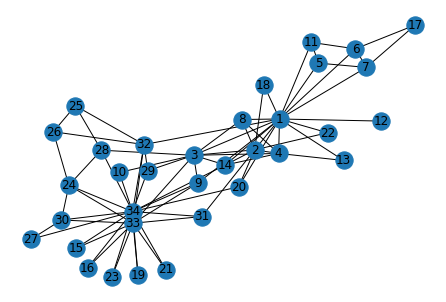

In [7]:
# Visualization of the graph
nx.draw(nx_G, with_labels=True);

## Simulate walks through the network

In [8]:
from node2vec import Graph

### Creating a graph

In [9]:
G = Graph(nx_G, is_directed=False, p=1, q=0.5)

### Computing transition probabilities among nodes

In [10]:
G.preprocess_transition_probs()

### Setting for alias sampling method of nodes and edges

In [11]:
G.alias_nodes

{1: (array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])),
 32: (array([0, 0, 0, 0, 0, 0]), array([1., 1., 1., 1., 1., 1.])),
 22: (array([0, 0]), array([1., 1.])),
 20: (array([0, 0, 0]), array([1., 1., 1.])),
 18: (array([0, 0]), array([1., 1.])),
 14: (array([0, 0, 0, 0, 0]), array([1., 1., 1., 1., 1.])),
 13: (array([0, 0]), array([1., 1.])),
 12: (array([0]), array([1.])),
 11: (array([0, 0, 0]), array([1., 1., 1.])),
 9: (array([0, 0, 0, 0]), array([1., 1., 1., 1.])),
 8: (array([0, 0, 0, 0]), array([1., 1., 1., 1.])),
 7: (array([0, 0, 0, 0]), array([1., 1., 1., 1.])),
 6: (array([0, 0, 0, 0]), array([1., 1., 1., 1.])),
 5: (array([0, 0, 0]), array([1., 1., 1.])),
 4: (array([0, 0, 0, 0, 0, 0]), array([1., 1., 1., 1., 1., 1.])),
 3: (array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])),
 2: (array([0, 0, 0, 0, 0, 0, 0, 0, 0]),
  array([1., 1., 1., 1., 1., 1., 1., 1

In [12]:
G.alias_edges[(1, 32)]

(array([5, 0, 1, 2, 3, 4]),
 array([0.54545455, 1.        , 0.90909091, 0.81818182, 0.72727273,
        0.63636364]))

In [13]:
G.alias_edges[(32, 1)]

(array([ 0,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 array([1.        , 0.96774194, 0.93548387, 0.90322581, 0.87096774,
        0.83870968, 0.80645161, 0.77419355, 0.74193548, 0.70967742,
        0.67741935, 0.64516129, 0.61290323, 0.58064516, 0.5483871 ,
        0.51612903]))

### Simulating walks through the graph with num_walks per nodes and walk_length of following nodes

In [14]:
walks = G.simulate_walks(num_walks=10, walk_length=20)

Walk iteration:
1/10
2/10
3/10
4/10
5/10
6/10
7/10
8/10
9/10
10/10


In [15]:
walks[:3]

[[24, 26, 24, 28, 3, 33, 19, 33, 34, 28, 24, 28, 3, 4, 2, 31, 33, 24, 28, 3],
 [29, 3, 10, 3, 1, 5, 11, 1, 4, 13, 1, 9, 3, 29, 34, 28, 25, 26, 24, 26],
 [23,
  34,
  27,
  30,
  33,
  23,
  34,
  15,
  33,
  31,
  33,
  3,
  28,
  24,
  26,
  25,
  32,
  29,
  34,
  10]]

In [16]:
print('Number of walks: {}'.format(len(walks)))

Number of walks: 340


### Convert node to string in order to be compatible with Word2Vec module

In [17]:
walks = [list(map(str, walk)) for walk in walks]

In [18]:
walks[:3]

[['24',
  '26',
  '24',
  '28',
  '3',
  '33',
  '19',
  '33',
  '34',
  '28',
  '24',
  '28',
  '3',
  '4',
  '2',
  '31',
  '33',
  '24',
  '28',
  '3'],
 ['29',
  '3',
  '10',
  '3',
  '1',
  '5',
  '11',
  '1',
  '4',
  '13',
  '1',
  '9',
  '3',
  '29',
  '34',
  '28',
  '25',
  '26',
  '24',
  '26'],
 ['23',
  '34',
  '27',
  '30',
  '33',
  '23',
  '34',
  '15',
  '33',
  '31',
  '33',
  '3',
  '28',
  '24',
  '26',
  '25',
  '32',
  '29',
  '34',
  '10']]

## Using Word2Vec to learn representation of the nodes in dimensional space

In [19]:
from gensim.models import Word2Vec

In [20]:
model = Word2Vec(walks, size=32, window=16, min_count=0, sg=1, workers=1, iter=20)

In [21]:
model.wv.save_word2vec_format('emb/karate.emb')

## Clustering the nodes in the network

### Importing the representation of the nodes in dimensional space

In [22]:
nodes = pd.read_csv('emb/karate.emb', skiprows=range(0, 1), sep=' ', header=None)

In [23]:
nodes = nodes.sort_values(by=0).reset_index(drop=True)

In [24]:
nodes.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,1,0.049579,-0.287068,-0.163696,-0.116625,0.076756,0.297346,0.159791,0.069643,-0.237043,...,-0.304198,0.074918,0.238473,-0.238810,-0.208530,-0.201765,0.378479,0.170671,-0.392243,-0.049985
1,2,0.170853,-0.070373,-0.223946,0.041382,-0.191695,0.235873,0.165441,-0.050720,-0.144563,...,-0.361488,0.057259,0.444489,-0.132698,-0.131688,-0.202870,0.354295,-0.004543,-0.556602,0.144919
2,3,0.129501,-0.072890,-0.232279,0.037337,-0.232894,0.224041,0.221057,-0.167253,-0.069077,...,-0.251280,0.095126,0.267668,-0.126621,-0.114479,-0.258370,0.433025,0.022715,-0.298094,0.099329
3,4,0.250868,-0.114509,-0.333502,0.112089,-0.209542,0.049769,0.177657,0.053754,-0.259096,...,-0.391200,0.019839,0.587669,-0.129393,-0.129331,-0.199207,0.326768,-0.038765,-0.625296,0.151944
4,5,-0.144337,-0.463881,0.008644,-0.334947,0.255183,0.702595,0.003379,0.222255,-0.263389,...,-0.298555,0.076533,0.036302,-0.374685,-0.248759,-0.189332,0.394197,0.290704,-0.424002,-0.195097


### Using KMeans algorithms to cluster the nodes

In [25]:
from sklearn.cluster import KMeans

In [26]:
cluster = KMeans(n_clusters=2)

In [27]:
cluster.fit(nodes.iloc[:, 1:])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [28]:
cluster.labels_

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

### Visualization of true clusters

In [29]:
ground_truth = [0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1]
colors = []
for n in ground_truth:
    if n == 0:
        colors.append('red')
    else:
        colors.append('green')

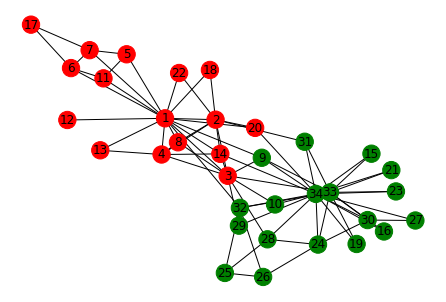

In [30]:
nx.draw(nx_G, with_labels=True, nodelist=sorted(nx_G.nodes()), node_color=colors)

### Visualization of learned clusters

In [31]:
colors = []
for l in cluster.labels_:
    if l == 0:
        colors.append('red')
    else:
        colors.append('green')

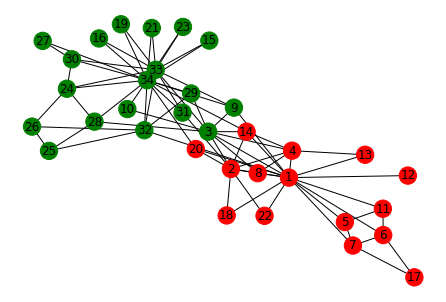

In [32]:
nx.draw(nx_G, with_labels=True, nodelist=sorted(nx_G.nodes()), node_color=colors)

In [33]:
wrong_nodes = (np.where(np.array(ground_truth)!=cluster.labels_)[0] + 1).tolist()
print('Wrong cluster nodes: {}'.format(wrong_nodes))

Wrong cluster nodes: [3]
